In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# DATASET
The dataset below has been explained in earlier notebooks and is being used here to carry on the data. 


In [38]:
contraceptive_data = pd.read_csv("contraceptive_method_dataset.csv", 
                                 encoding = "ISO-8859-1", engine='python')
X = contraceptive_data.drop('children', axis=1).copy()
contraceptive_data['predictor_population']= pd.cut(contraceptive_data['children'],
                                       [-1,2,16], labels=[0,1])
contraceptive_data['predictor_population_i']= contraceptive_data['predictor_population'].astype(int)
y= contraceptive_data['predictor_population_i']


# Splitting of the Training and Testing Data
Training mean and std calculated when the X train was fitted into the std scaler. 
For the X train scaled, the training mean and std was used only. 
While for the X test scaled, the test data was transformed.
  

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 24, stratify = y )
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled  = std_scaler.transform(X_test)

# K-Mean

## The Calinski Harbasz Method

In [40]:
##  install yellowbrick library 
from yellowbrick.cluster import KElbowVisualizer
## From sklearn.cluster we will call KMeans
from sklearn.cluster import KMeans

# Instantiate the clustering model and visualizer
model = KMeans()

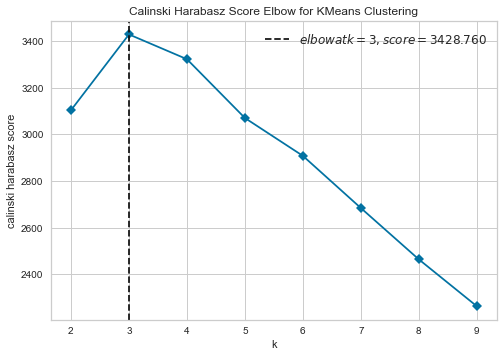

In [41]:
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'calinski_harabasz', timings=False)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


## The Silhouette Method

C:\Users\Marissa\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Marissa\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Marissa\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


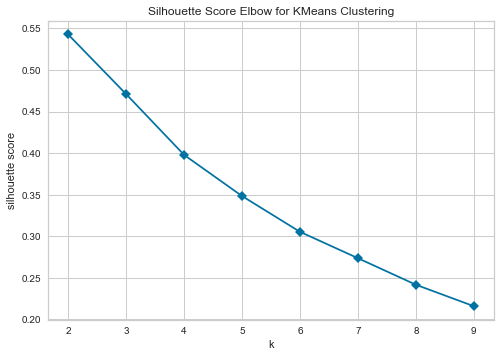

In [42]:
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette', timings=False)
visualizer.fit(X)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

_Note_
- Two methods of Kmeans are used in this project which are the Calinski Harbabasz and the Silhouette. The Calinski Harbabasz's elbow is more pronounced which can be found in 3 and the score of 3428.76. On the other hand, Silhouette elbow can not be detected in this chart.

# Ridge, Lasso and Logistic Regression Test Model


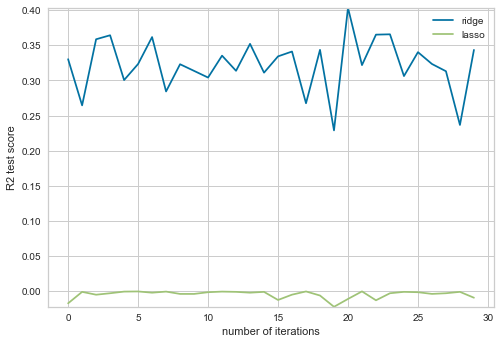

In [43]:
def model_experiment(num_iter = 5, 
                     models = ['logreg', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    x_axis = np.arange(num_iter)
    y_logreg_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'logreg' in models:
            lr = LogisticRegression()

            lr.fit(X_train, y_train)
            
            sample_models['logreg'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_logreg_test.append(test_score)

    #       print('test score logreg is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #       print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'logreg' in models:
        plt.plot(y_logreg_test, label = 'logreg')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_logreg_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    return sample_models

trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 2)


_Notes_
- The R2 test score for ridge has more dips and peaks than lasso. Lasso and Ridge graph has a variance between 0 to .40. There difference lies in the question which becomes evident in the outcome.  The ridge equation shrinks the slope asymphotically close to 0 while the lasso can shrink all the way to 0. Lasso can exclude useless variables from the equations while ridge performs better when most variables are useful.


C:\Users\Marissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Marissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marissa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

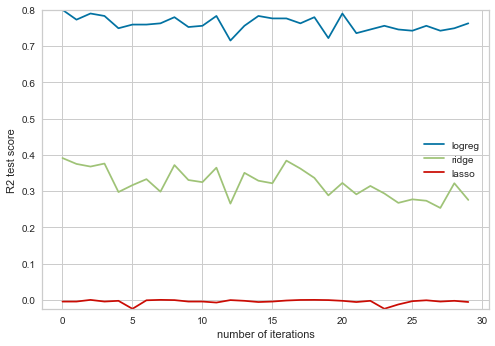

In [44]:
trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['logreg', 'ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 2)


_Notes_
- Based on the chart, the lasso is flatter than logistic regression and ridge, but lasso is closer in (variance) distance from ridge than logistic regression. However, logistic regression have a very similar dip and peaks with ridge. As mentioned earlier, lasso shrinks variables that it deems useless.

In [45]:
# After run model_experiment with complexity == 'polynomial'

lr_logreg = trained_models['logreg']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']


In [46]:
lr_lasso.coef_

array([ 0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,
        0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

In [47]:
lr_ridge.coef_

array([ 0.        ,  0.21485848, -0.04756215, -0.07639933,  0.00894501,
       -0.06148514, -0.02055542, -0.05959208,  0.05476268,  0.05049399,
       -0.20100865,  0.17115575,  0.06289189, -0.00131794,  0.0193476 ,
        0.07533466, -0.06130082, -0.00226704,  0.17961197, -0.13716494,
       -0.04104801,  0.02756831,  0.02469606,  0.03100048,  0.01056552,
        0.01925517, -0.05165728, -0.0107461 , -0.07305568, -0.00027159,
        0.00366223,  0.05274584, -0.06014848,  0.1040399 ,  0.00894501,
        0.08687249,  0.02261981, -0.02311963, -0.06946134,  0.03237547,
       -0.06148514, -0.01284966,  0.06197828,  0.02586323,  0.00567712,
       -0.08228442, -0.0187833 , -0.01357747,  0.02705938,  0.06509389,
       -0.01439935, -0.01724075,  0.05476268,  0.02692426, -0.17912501])

In [48]:
lr_logreg.coef_

array([[ 0.        ,  1.55920569, -0.29393194, -0.50425577,  0.09563895,
        -0.59178528, -0.21838443, -0.30860176,  0.43849   ,  0.03646784,
        -1.61202281,  1.1161065 ,  0.3216065 , -0.10064032,  0.27673465,
         0.43409013, -0.75563134,  0.40392534,  1.78037004, -0.94279541,
        -0.35167285,  0.26404335,  0.30992795,  0.22931916,  0.04213676,
         0.09988825, -0.38027123,  0.04225797, -0.55218751, -0.02820107,
         0.06372254,  0.38773404, -0.64366733,  0.74952231,  0.09563895,
         0.63323355,  0.19258512, -0.20468972, -0.78841818,  0.23365253,
        -0.59178528, -0.04238199,  0.39507399,  0.21194458,  0.11278912,
        -0.54856435, -0.08504109, -0.29937727,  0.15907048,  0.65146662,
        -0.18480188, -0.31190477,  0.43849   ,  0.59940331, -1.3909777 ]])

_Notes_
- As we see from above, lasso uses 0 coefficient which allows more predictability, and there are many useless variables in the data which is why it shrinks to 0. 